In [ ]:
# QUESTO FILE ANALIZZA IN MODO PIù GENERALE GLI ORDINI CON VOLUMI ALTI CON TIMEFRAME MAGGIORI UGUALI A 15 MINUTI
# L'ANALISI NON HA PORTATO AD UN RISULTATO SODDISFACENTE


from Functions import total_function_multiprocessing
from Helpers import create_event_keys
from time import sleep
import json

# if True, the analysis starts from the current event-keys used in production
# else, it starts an analysis based on the keys in "event_keys" folder
KEEP_PRODUCTION_ANALYSIS = True

if not KEEP_PRODUCTION_ANALYSIS:
    analysis_name = '2023-2024-analysis-10-250-higherfrequency'
    list_minutes = '1440'
    event_keys_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/event_keys/event_keys.json"
    event_keys = create_event_keys(event_keys_path, list_minutes, analysis_name)
else:
    riskmanagement_json_prod_path = "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/riskmanagement.json"
    with open(riskmanagement_json_prod_path, 'r') as file:
        # Retrieve shared memory for JSON data and "start_interval"
        riskmanagement_json_prod = json.load(file)
        event_keys = list(riskmanagement_json_prod.keys())

n_processes = 8
analysis_timeframe=7

UNLOCK = True
n_iterations = 10

for i in range(n_iterations):
    if UNLOCK:
        shared_data = total_function_multiprocessing(event_keys, analysis_timeframe, n_processes, KEEP_PRODUCTION_ANALYSIS) 
        iterazione = i+1
    msg=f'{iterazione}/{n_iterations} COMPLETED'
    print(msg)

    print('sleeping')
    sleep(5)

In [3]:
#DOWNLOAD AND SHOW OUTPUT FROM TOTAL MULTIPROCESSING

import sys
sys.path.insert(0,'..')
from Functions import download_show_output
from Helpers import filter_complete_info_by_current_eventkeys
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', None)

minimum_event_number = 1
minimum_event_number_list = [minimum_event_number]
mean_threshold = -10
frequency_threshold = 0
std_multiplier = 10
early_validation = False
# file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-sell-50-150-450.json",
#              "/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json/analysis-buy-sell-10-250-highfrequency.json"]

file_paths = ["/Users/albertorainieri/Personal/analysis/Analysis2024/analysis_json_production/analysis.json"]
start_analysis= datetime(2025,1,1)
early_validation = datetime(2026,1,1)
xth_percentile=100
filter_field='mean' #mean, std, max, min
output, complete_info = download_show_output(minimum_event_number=minimum_event_number,mean_threshold=mean_threshold, frequency_threshold=frequency_threshold,
                                              early_validation=early_validation, std_multiplier=std_multiplier, file_paths=file_paths,
                                                start_analysis=start_analysis, DELETE_99_PERCENTILE=True, filter_field=filter_field, xth_percentile=xth_percentile)


output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)

df = pd.DataFrame(output).transpose()
n_event_keys = len(df['mean'])
print(f'Number of event_keys: {n_event_keys}')
daily_frequency_all_events = int(sum(df['frequency/month']) / 30)
print(f'Daily frequency of events: {daily_frequency_all_events}')

#df.sort_values(by=['mean'], ascending=False)

#df.sort_values(by=['lower_bound'], ascending=False)

Filtered 17 event_keys
Number of event_keys: 23
Daily frequency of events: 1


In [5]:
complete_info['buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150'].keys()

dict_keys(['info', 'n_coins', 'events', 'frequency/month'])

In [ ]:
# from Helpers import filter_complete_info_by_current_eventkeys
# output, complete_info = filter_complete_info_by_current_eventkeys(output, complete_info)


In [ ]:
# from Helpers import create_rismanagement_from_complete_info
# create_rismanagement_from_complete_info(complete_info)

In [ ]:
from Helpers import frequency_events_analysis
frequency_events_analysis(complete_info)


In [ ]:
from Analysis2023.Functions import check_investment_amount
check_investment_amount(complete_info, output, investment_amount=150)

In [ ]:
from Helpers import get_timeseries
from Helpers import get_analysis


output, complete_info = get_analysis()
event_keys_filter = []
check_past=180 #minutes before event trigger
check_future=180 #minutes after the end of event (usually after 1 days from event trigger)
jump=0.04 #jump from price levels in terms of cumulative volume order (from 0 to 1)
limit=0.25 #get the window of price change (from 0 to 1) (e.g. 0.15 check only the orders whose level is within 15% price change from current price)
price_change_jump = 0.025 #range of price change (used in get_price_levels for bid/ask_order_distribution)
max_limit = 0.2 #what is the max change, beyond that I won't consider triggers ---> ( max_price - initial_price ) / initial_price
price_drop_limit = 0.05  #current drop from max. The minimum drop from the maximum for triggering events ---> abs( (current_price - max_price) / max_price )
distance_jump_to_current_price = 0.03 # minimum distance from jump
max_ask_order_distribution_level = 0.1 # max percentage of ask volume at the first level (level is based on price_change_jump)
last_i_ask_order_distribution= 1 # how many last order distribution obs I consider, an np.mean is executed
save_plot=False
analyze=True
#event_keys_filter = ['buy_vol_15m:0.25/vol_15m:3/timeframe:1440/lvl:50', 'buy_vol_1m:0.15/vol_1m:50/timeframe:1440/lvl:150']
get_timeseries(complete_info, check_past=check_past, check_future=check_future, jump=jump, limit=limit, event_keys_filter = event_keys_filter,
                   price_change_jump = price_change_jump, max_limit = max_limit, price_drop_limit = price_drop_limit,
                     distance_jump_to_current_price = distance_jump_to_current_price, max_ask_order_distribution_level = max_ask_order_distribution_level,
                       last_i_ask_order_distribution= last_i_ask_order_distribution, save_plot=save_plot, analyze=analyze)


Filtered 17 event_keys
Number of event_keys: 23
Daily frequency of events: 2



#####################################################################
1/23 Event Key: buy_vol_1m:0.9/vol_1m:50/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
2/23 Event Key: buy_vol_5m:0.8/vol_5m:20/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



#####################################################################
3/23 Event Key: buy_vol_15m:0.8/vol_15m:8/timeframe:1440/lvl:150
#####################################################################
Order Book Metadata is up to date
Timeseries is up to date
Full Timeseries is up to date 



############################

/Users/albertorainieri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[-0.5, -0.4, -0.3, -0.2, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
[0, 0, 1, 5, 6, 48, 44, 18, 10, 5, 4, 1]


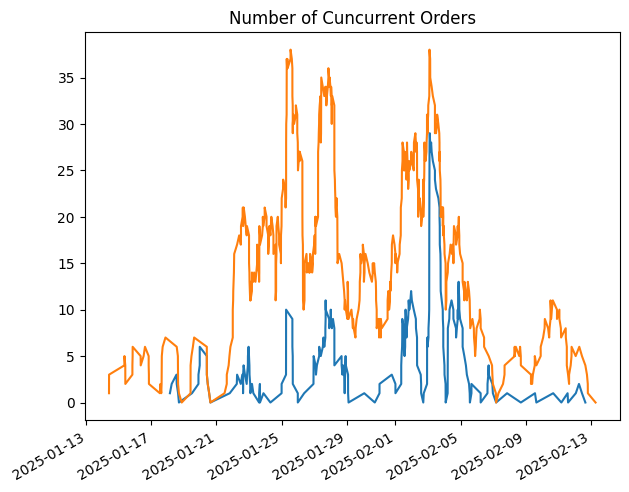

142
351


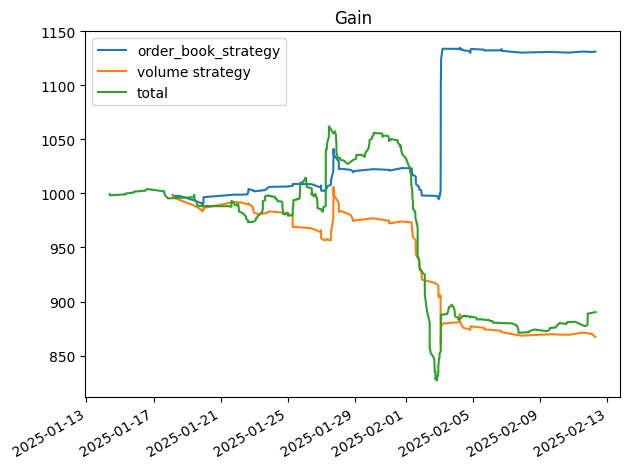

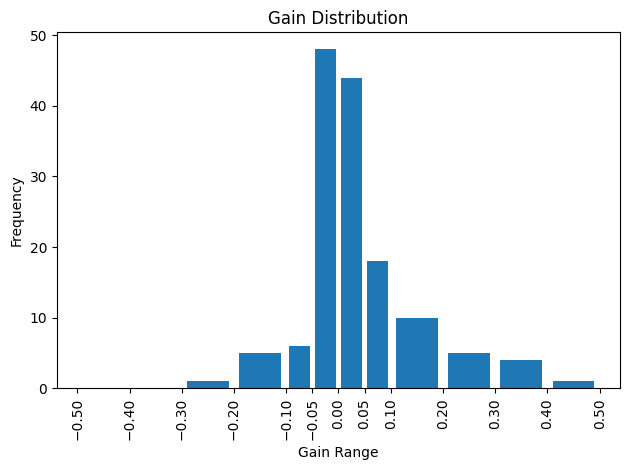

Initial Investment: 1000 euro
Invesment per event: 34.48 euro
Commission: 6.98 euro
Total Investment 4896.55
Average Profit per event: 2.82%
Profit: 131.3 euro
Number of orders: 142


In [1]:
from Helpers import plot_strategy_result
df = plot_strategy_result()

In [ ]:
from Helpers import get_plots
from IPython.display import Image, display
left_gain = -1
right_gain = -0.05
paths_png = get_plots(left_gain, right_gain)
